# 1.数据预处理

In [2]:
# 1.数据初探
# 1.1首先导入要使用的科学计算包numpy，pandas，可视化matplotlib，seaborn,以及机器学习包sklearn。
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
from IPython.display import display

plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif': ['simhei', 'Arial']})
# % matplotlib inline

In [3]:
# 1.2然后导入数据，并进行初步的观察，这些观察包括了解数据特征的缺失值，异常值，以及大概的描述性统计。
# 导入链家房屋数据
data = pd.read_csv("./data.csv")
display(data.head(n=2))

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988


In [5]:
data[data["Layout"]=="叠拼别墅"][:5]

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
1168,240.97平米,长阳,毛坯,5,世茂维拉,101102253577,叠拼别墅,1080.0,房山,南北,5.0,2015
1458,242.78平米,长阳,毛坯,5,世茂维拉,101102217569,叠拼别墅,1100.0,房山,南北,5.0,2015
1797,242.96平米,长阳,精装,5,世茂维拉,101101911559,叠拼别墅,980.0,房山,南北,5.0,2015
2268,295.88平米,顺义其它,精装,4,龙湖好望山,101102431983,叠拼别墅,1000.0,顺义,南北,4.0,2014
2274,295.01平米,顺义其它,精装,4,鹭峯国际,101102300614,叠拼别墅,1450.0,顺义,南北,5.0,2014


In [5]:
# 添加新特征房屋均价
df = data.copy()
df['PerPrice'] = data['Price'] / data['Size']
df[:2]

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year,PerPrice
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988,10.40
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988,11.75


In [6]:
# 重新摆放列位置
columns = ['Region', 'District', 'Garden', 'Layout', 'Floor', 'Year', 'Size', 'Elevator', 'Direction', 'Renovation',
           'PerPrice', 'Price']

df = pd.DataFrame(df, columns=columns)
# 重新审视数据集
display(df.head(n=2))


,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,NaN,东西,精装,10.40,780.0
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,无电梯,南北,精装,11.75,705.0


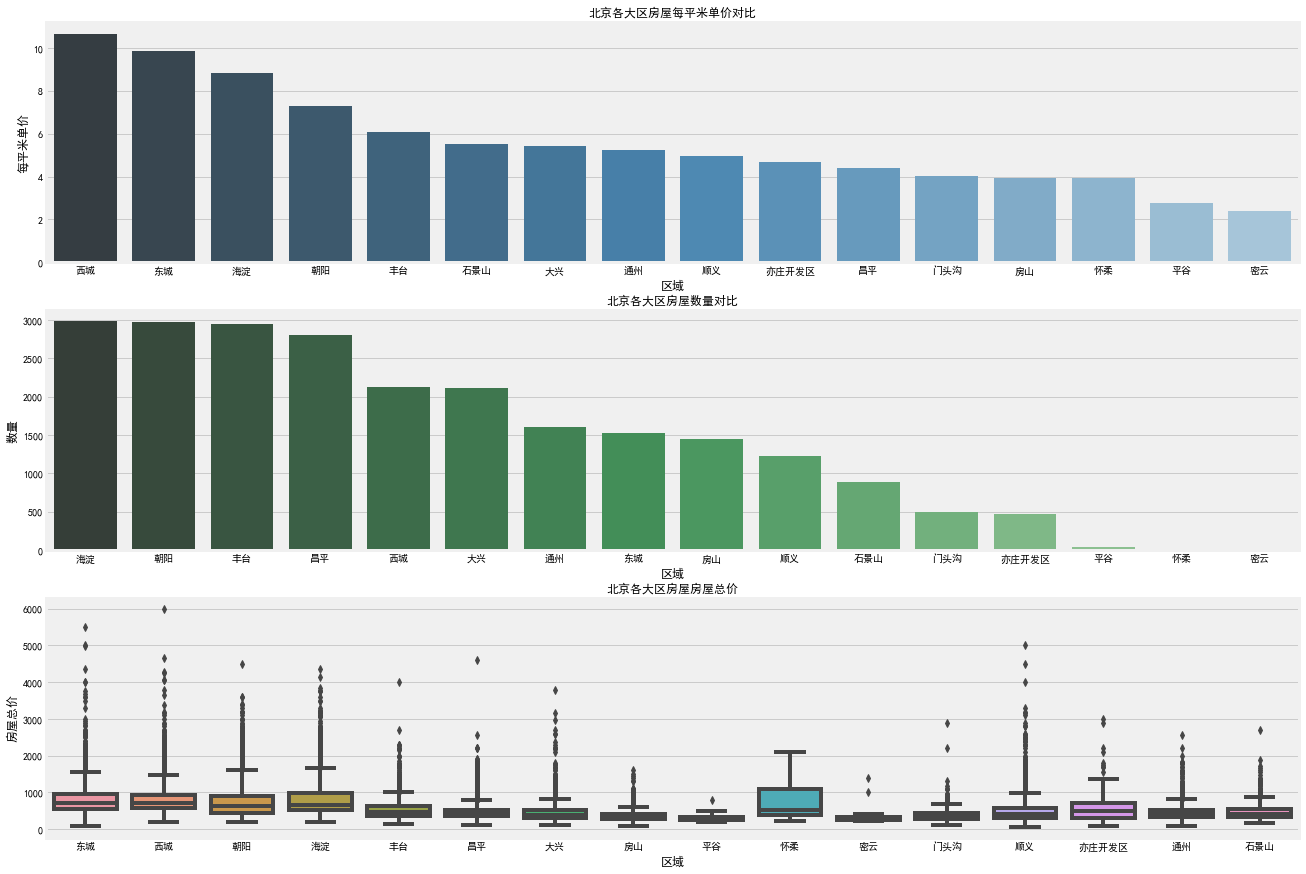

In [7]:
# 2 数据可视化分析
# 2.1 Region特征分析

# 对于区域特征，我们可以分析不同区域房价和数量的对比。
# 对房屋区域分组对比房屋数量和每平米房价
# 使用了pandas的网络透视功能 groupby 分组排序。
# 区域特征可视化直接采用 seaborn 完成，颜色使用调色板 palette 参数，颜色渐变，越浅说明越少，反之越多
df_house_count = df.groupby('Region')['Price'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean = df.groupby('Region')['PerPrice'].mean().sort_values(ascending=False).to_frame().reset_index()

f, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(20, 15))
sns.barplot(x='Region', y='PerPrice', palette="Blues_d", data=df_house_mean, ax=ax1)
ax1.set_title('北京各大区房屋每平米单价对比', fontsize=12)
ax1.set_xlabel('区域', fontsize=12)
ax1.set_ylabel('每平米单价', fontsize=12)

sns.barplot(x='Region', y='Price', palette="Greens_d", data=df_house_count, ax=ax2)
ax2.set_title('北京各大区房屋数量对比', fontsize=12)
ax2.set_xlabel('区域', fontsize=12)
ax2.set_ylabel('数量', fontsize=12)

sns.boxplot(x='Region', y='Price', data=df, ax=ax3)
ax3.set_title('北京各大区房屋房屋总价', fontsize=12)
ax3.set_xlabel('区域', fontsize=12)
ax3.set_ylabel('房屋总价', fontsize=12)

# plt.show()
plt.savefig("Region.png")

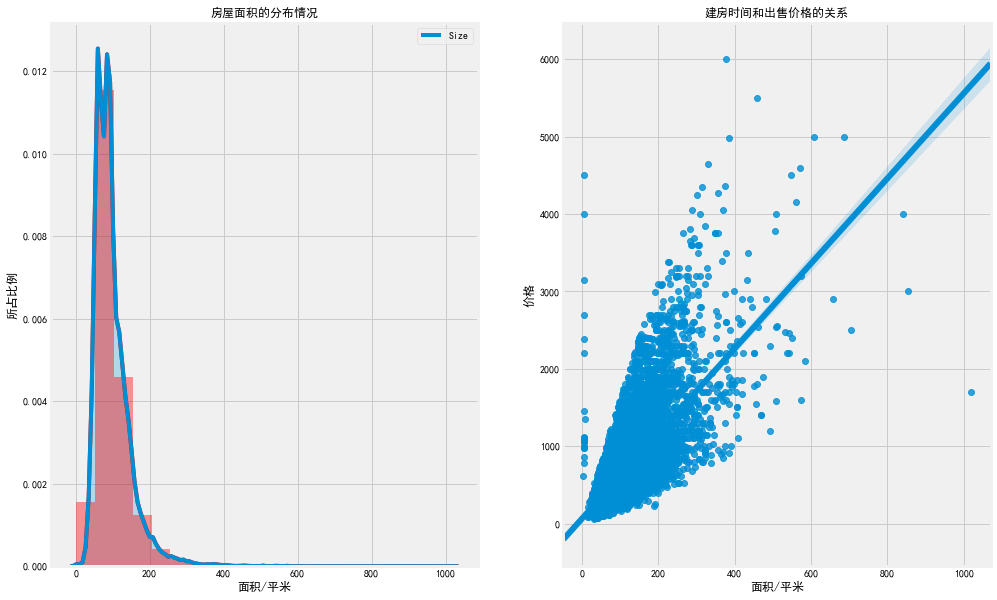

In [8]:
# 2.2 Size特征分析
f, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 10))

# 房屋面积的分布情况
sns.distplot(df['Size'], bins=20, ax=ax1, color='r')
sns.kdeplot(df['Size'], shade=True, ax=ax1)
ax1.set_title('房屋面积的分布情况', fontsize=12)
ax1.set_xlabel('面积/平米', fontsize=12)
ax1.set_ylabel('所占比例', fontsize=12)

# 建房时间和出售价格的关系
sns.regplot(x='Size', y='Price', data=df, ax=ax2)
ax2.set_title('建房时间和出售价格的关系', fontsize=12)
ax2.set_xlabel('面积/平米', fontsize=12)
ax2.set_ylabel('价格', fontsize=12)
# plt.show()
plt.savefig('Size.png')

In [9]:
print("房屋面积小于10平米：")
df.loc[df['Size'] < 10]

房屋面积小于10平米：


,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
1168,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,240.97平米,南北,216.000000,1080.0
1458,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,242.78平米,南北,220.000000,1100.0
1797,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,精装,242.96平米,南北,196.000000,980.0
2268,顺义,顺义其它,龙湖好望山,叠拼别墅,4,2014,4.0,精装,295.88平米,南北,250.000000,1000.0
2274,顺义,顺义其它,鹭峯国际,叠拼别墅,4,2014,5.0,精装,295.01平米,南北,290.000000,1450.0
2276,顺义,顺义其它,龙湖好望山,叠拼别墅,3,2014,4.0,毛坯,292.31平米,南北,215.000000,860.0
2432,顺义,顺义其它,龙湖好望山,叠拼别墅,5,2013,6.0,精装,294.42平米,南北,163.333333,980.0
4078,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,4.0,精装,427.5平米,南北,787.500000,3150.0
4079,大兴,西红门,鸿坤林语墅,叠拼别墅,4,2015,4.0,精装,361.8平米,南北,595.000000,2380.0
4761,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,5.0,精装,386.83平米,南北,540.000000,2700.0


In [10]:
print("房屋面积大于1000平米：")
df.loc[df['Size'] > 1000]

房屋面积大于1000平米：


,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
8754,通州,通州其它,新华联科技大厦,1房间0卫,8,2009,1019.0,有电梯,南,简装,1.668302,1700.0


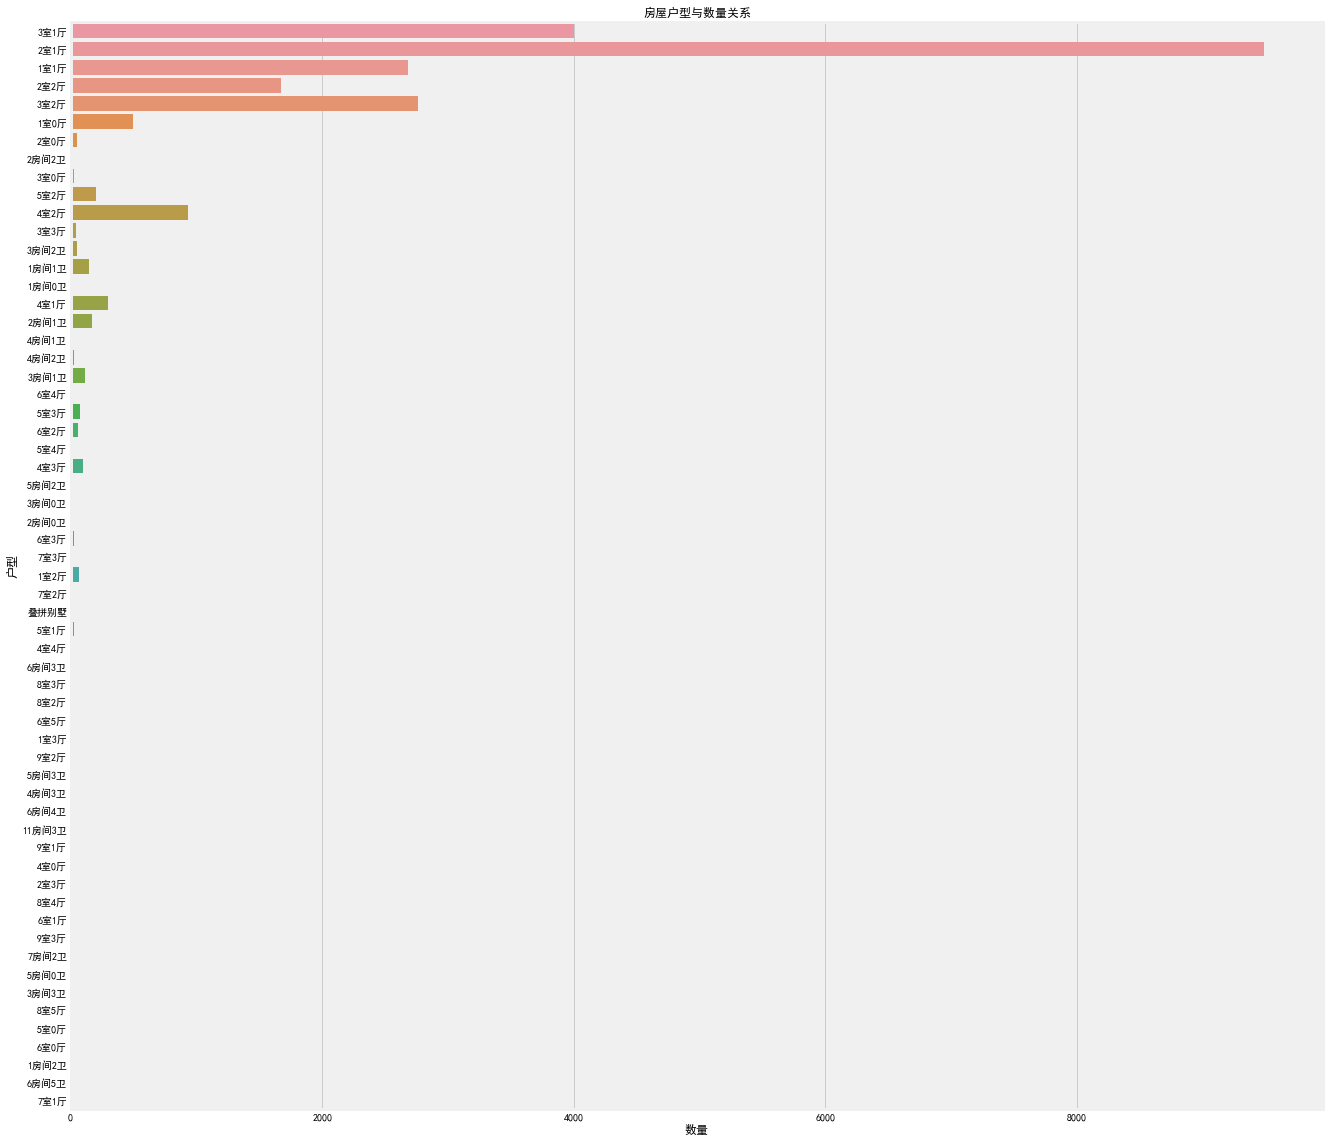

In [11]:
# 2.3 Layout特征分析
f, ax1 = plt.subplots(figsize=(20, 20))
sns.countplot(y='Layout', data=df, ax=ax1)
ax1.set_title('房屋户型与数量关系', fontsize=12)
ax1.set_xlabel('数量', fontsize=12)
ax1.set_ylabel('户型', fontsize=12)
# plt.show()
plt.savefig('Layout.png')

In [ ]:
# 2.4Renovation特征分析
print(df['Renovation'].value_counts())
# 去掉数据中装修特征“南北”
df['Renovation'] = df.loc[(df['Renovation'] != '南北'), 'Renovation']
# 画幅设置
f, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(20, 10))
sns.countplot(df['Renovation'], ax=ax1)
ax1.set_title('装修特征与数量关系', fontsize=12)
ax1.set_xlabel('装修特征', fontsize=12)
ax1.set_ylabel('数量', fontsize=12)

sns.barplot(x='Renovation', y='Price', data=df, ax=ax2)
ax2.set_title('装修特征与价格关系', fontsize=12)
ax2.set_xlabel('装修特征', fontsize=12)
ax2.set_ylabel('价格', fontsize=12)

sns.boxplot(x='Renovation', y='Price', data=df, ax=ax3)
ax3.set_title('装修特征与数量关系箱型图', fontsize=12)
ax3.set_xlabel('装修特征', fontsize=12)
ax3.set_ylabel('数量', fontsize=12)
# plt.show()
plt.savefig('Renovation.png')

In [ ]:
# 2.5Elevator特征分析
# 初探数据时，Elevator有大量的缺失值
misn = len(df.loc[(df['Elevator'].isnull()), 'Elevator'])
print("电梯的缺失值数量：", misn)

# 由于存在个别类型错误，如简装和精装，特征值错位，故需要移除
df['Elevator'] = df.loc[(df['Elevator'] == '有电梯') | (df['Elevator'] == '无电梯'), 'Elevator']

# 填补Elevator缺失值  随机的
df.loc[(df['Floor'] > 6) & (df['Elevator'].isnull()), 'Elevator'] = '有电梯'
df.loc[(df['Floor'] <= 6) & (df['Elevator'].isnull()), 'Elevator'] = '无电梯'

f, [ax1, ax2] = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(df['Elevator'], ax=ax1)
ax1.set_title('有无电梯数量对比', fontsize=15)
ax1.set_xlabel('是否有电梯')
ax1.set_ylabel('数量')
sns.barplot(x='Elevator', y='Price', data=df, ax=ax2)
ax2.set_title('有无电梯房价对比', fontsize=15)
ax2.set_xlabel('是否有电梯')
ax2.set_ylabel('总价')
# plt.show()
plt.savefig("Elevator.png")

In [ ]:
#2.6 Year特征分析
# grid = sns.FacetGrid(df, row='Elevator', col='Renovation', palette='seismic',size=4)
grid = sns.FacetGrid(df, row='Elevator', col='Renovation', palette='seismic',height=4)
grid.map(plt.scatter, 'Year', 'Price')
grid.add_legend()
grid.savefig("Year.png")